In [1]:
from keras.datasets.cifar100 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


169009152/169001437 [==============================] - 15s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

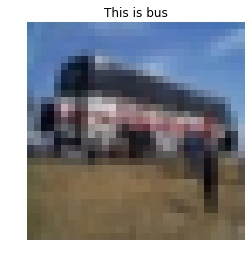

In [23]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + labels[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [0]:
# 圖片處理: /255
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [25]:
# 答案處理: One-Hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("before:", y_train[0])
print("after:", y_train_cat[0])

before: [19]
after: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 3 * 3 * 3(一個過濾器) * 64 + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 3 * 3 * 64(一個過濾器) * 128 + 128(bias) = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(100, activation="softmax"))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)        

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [32]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=15,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 13s - loss: 2.0697 - acc: 0.4372 - val_loss: 2.5017 - val_acc: 0.3638
Epoch 2/5
 - 13s - loss: 1.8978 - acc: 0.4728 - val_loss: 2.5094 - val_acc: 0.3796
Epoch 3/5
 - 13s - loss: 1.7295 - acc: 0.5112 - val_loss: 2.5256 - val_acc: 0.3800
Epoch 4/5
 - 13s - loss: 1.5746 - acc: 0.5445 - val_loss: 2.5893 - val_acc: 0.3844
Epoch 5/5
 - 13s - loss: 1.4358 - acc: 0.5814 - val_loss: 2.6319 - val_acc: 0.3934


In [33]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 3s 258us/step


[2.570154725646973, 0.4039]

In [34]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)

c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,apple(預測),aquarium_fish(預測),baby(預測),bear(預測),beaver(預測),bed(預測),bee(預測),beetle(預測),bicycle(預測),bottle(預測),bowl(預測),boy(預測),bridge(預測),bus(預測),butterfly(預測),camel(預測),can(預測),castle(預測),caterpillar(預測),cattle(預測),chair(預測),chimpanzee(預測),clock(預測),cloud(預測),cockroach(預測),couch(預測),crab(預測),crocodile(預測),cup(預測),dinosaur(預測),dolphin(預測),elephant(預測),flatfish(預測),forest(預測),fox(預測),girl(預測),hamster(預測),house(預測),kangaroo(預測),keyboard(預測),...,plain(預測),plate(預測),poppy(預測),porcupine(預測),possum(預測),rabbit(預測),raccoon(預測),ray(預測),road(預測),rocket(預測),rose(預測),sea(預測),seal(預測),shark(預測),shrew(預測),skunk(預測),skyscraper(預測),snail(預測),snake(預測),spider(預測),squirrel(預測),streetcar(預測),sunflower(預測),sweet_pepper(預測),table(預測),tank(預測),telephone(預測),television(預測),tiger(預測),tractor(預測),train(預測),trout(預測),tulip(預測),turtle(預測),wardrobe(預測),whale(預測),willow_tree(預測),wolf(預測),woman(預測),worm(預測)
apple(正確),63,3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0
aquarium_fish(正確),0,53,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,3,0,1,1,0,1,0,1,7,0,1,2,0,1,0,2,0,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0
baby(正確),0,1,37,0,0,4,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,2,0,0,17,2,0,0,0,...,0,0,0,0,1,2,0,0,0,1,2,0,1,0,0,0,0,3,0,0,1,0,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
bear(正確),0,0,0,29,8,0,2,1,0,0,0,0,0,0,2,3,0,0,0,2,0,4,1,1,0,0,0,1,1,1,1,9,1,0,0,1,2,1,0,0,...,0,0,0,4,4,1,1,0,0,0,0,0,3,1,1,0,1,2,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
beaver(正確),0,0,1,5,21,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,6,1,0,2,0,...,0,0,0,7,2,1,0,1,0,0,0,0,0,0,7,0,0,11,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,4,0,0,0,0,0,0
bed(正確),0,0,1,0,0,44,0,0,1,0,1,0,1,2,0,1,0,0,0,0,1,0,1,3,2,5,1,0,0,0,0,0,2,1,0,0,1,1,0,0,...,0,0,0,0,0,2,0,0,1,2,0,2,0,0,0,0,0,1,0,1,0,4,0,0,3,1,1,1,0,1,0,2,0,1,1,0,0,0,0,0
bee(正確),0,0,1,1,1,0,50,3,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,0,3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,...,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,5,0,1,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0
beetle(正確),0,0,0,1,0,0,5,48,1,1,0,0,0,0,13,0,1,0,3,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,2,0,0,3,2,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
bicycle(正確),0,0,1,1,0,1,0,0,42,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,3,0,0,3,2,3,0,0,0,0,0,1,1,0,0
bottle(正確),0,1,0,1,0,0,1,1,0,44,0,1,1,0,1,4,0,0,4,0,0,0,0,0,1,0,0,0,4,0,0,0,2,0,0,2,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,1,0,2,0,1,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0


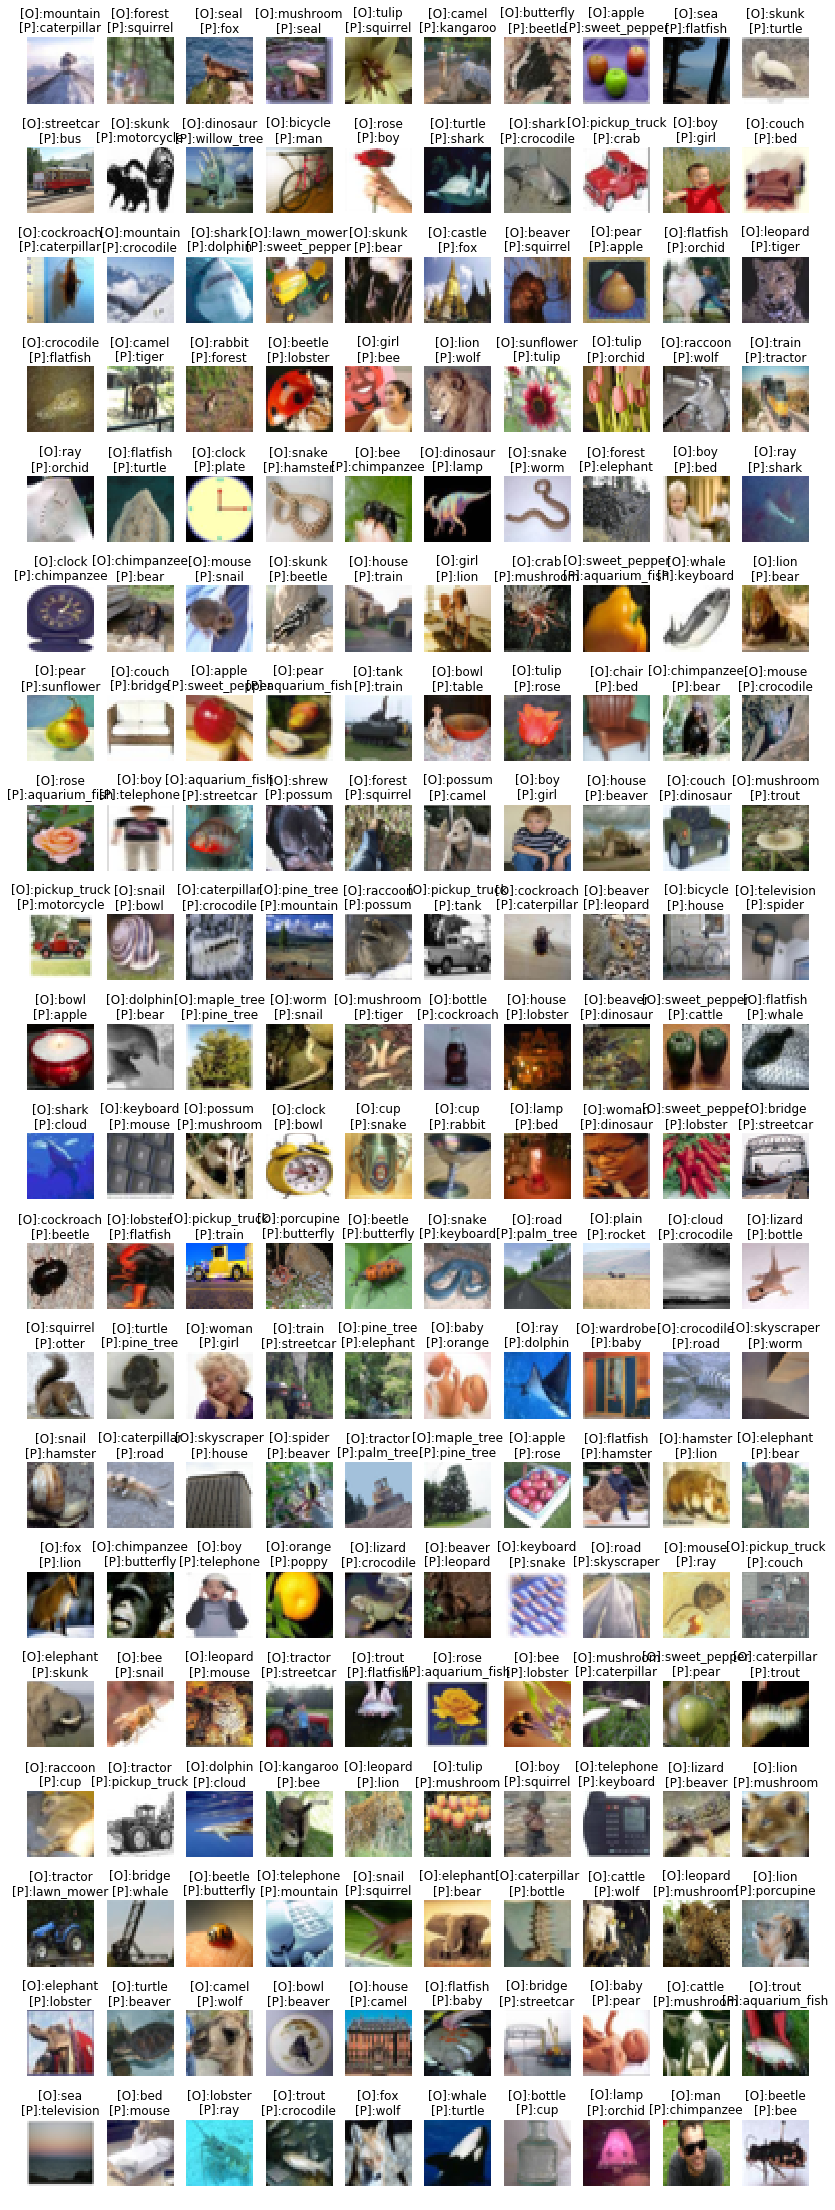

In [35]:
import numpy as np
# 要reshape, 10000, 1 不等於 10000
y_test_re = y_test.reshape(10000)
idx = np.nonzero(pre != y_test_re)[0][:200]
false_img = x_test[idx]
false_answer = y_test_re[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [54]:
import numpy as np
mat = confusion_matrix(y_test, pre)
right = []
for i, m in enumerate(mat):
    # 找出預測錯誤最多的那種
    mcopy = m.copy()
    mcopy[i] = 0
    false = mcopy.argmax()
    right.append((i, m[i], false))
s = sorted(right, key=lambda t:t[1])
s

[(55, 7, 4),
 (11, 9, 35),
 (72, 13, 77),
 (78, 14, 44),
 (98, 14, 35),
 (46, 16, 35),
 (66, 16, 97),
 (25, 17, 5),
 (38, 17, 80),
 (44, 17, 18),
 (10, 20, 61),
 (84, 20, 5),
 (4, 21, 77),
 (45, 21, 26),
 (13, 22, 81),
 (50, 22, 77),
 (65, 22, 77),
 (42, 23, 50),
 (64, 23, 50),
 (22, 24, 61),
 (80, 24, 65),
 (93, 25, 4),
 (30, 26, 95),
 (74, 26, 63),
 (32, 28, 67),
 (3, 29, 31),
 (19, 30, 15),
 (27, 31, 44),
 (40, 31, 28),
 (67, 31, 93),
 (79, 31, 6),
 (92, 31, 70),
 (12, 32, 37),
 (14, 32, 18),
 (26, 32, 45),
 (59, 32, 52),
 (83, 32, 53),
 (37, 33, 17),
 (90, 33, 81),
 (96, 33, 47),
 (99, 33, 44),
 (51, 34, 77),
 (77, 34, 18),
 (29, 35, 15),
 (35, 35, 2),
 (97, 35, 64),
 (2, 37, 35),
 (15, 37, 38),
 (16, 37, 40),
 (31, 37, 3),
 (43, 37, 15),
 (33, 40, 96),
 (88, 40, 42),
 (36, 41, 50),
 (8, 42, 48),
 (34, 42, 80),
 (57, 42, 0),
 (87, 42, 94),
 (18, 43, 77),
 (5, 44, 25),
 (9, 44, 57),
 (86, 44, 87),
 (73, 45, 93),
 (7, 48, 14),
 (58, 48, 13),
 (85, 48, 37),
 (91, 48, 27),
 (89, 49, 90

In [55]:
for i, t in enumerate(s[:10]):
    print("倒數第", i, ":", labels[t[0]])
    print("命中率:", t[1], "%")
    print("最容易被混淆成:", labels[t[2]])
                  

倒數第 0 : otter
命中率: 7 %
最容易被混淆成: beaver
倒數第 1 : boy
命中率: 9 %
最容易被混淆成: girl
倒數第 2 : seal
命中率: 13 %
最容易被混淆成: snail
倒數第 3 : snake
命中率: 14 %
最容易被混淆成: lizard
倒數第 4 : woman
命中率: 14 %
最容易被混淆成: girl
倒數第 5 : man
命中率: 16 %
最容易被混淆成: girl
倒數第 6 : raccoon
命中率: 16 %
最容易被混淆成: wolf
倒數第 7 : couch
命中率: 17 %
最容易被混淆成: bed
倒數第 8 : kangaroo
命中率: 17 %
最容易被混淆成: squirrel
倒數第 9 : lizard
命中率: 17 %
最容易被混淆成: caterpillar


In [58]:
for i, t in enumerate(s[-10:][::-1]):
    print("第", i, ":", labels[t[0]])
    print("命中率:", t[1], "%")
    print("最容易被混淆成:", labels[t[2]])
                  

第 0 : orange
命中率: 79 %
最容易被混淆成: pear
第 1 : sunflower
命中率: 72 %
最容易被混淆成: poppy
第 2 : plain
命中率: 72 %
最容易被混淆成: castle
第 3 : cloud
命中率: 71 %
最容易被混淆成: sea
第 4 : chair
命中率: 69 %
最容易被混淆成: bed
第 5 : road
命中率: 68 %
最容易被混淆成: sea
第 6 : skunk
命中率: 67 %
最容易被混淆成: bear
第 7 : motorcycle
命中率: 67 %
最容易被混淆成: bicycle
第 8 : palm_tree
命中率: 65 %
最容易被混淆成: oak_tree
第 9 : castle
命中率: 65 %
最容易被混淆成: house
